# **RIO-125: Automate sentiment analysis of textual comments and feedback**


#Loading Dataset

**Getting dataset**

---



Since Google Colab is built on Linux we can execute Linux commands in Colab and one of the commands to retrieve datasets is wget. wget stands for ‘web get’ and using this command will retrieve the dataset directly from the source straight to the Google Drive without being downloaded to your computer. Far more efficient and faster.

In [ ]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2023-05-06 04:12:04--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  24.1MB/s    in 4.1s    

2023-05-06 04:12:09 (19.8 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
'''Python shutil module provides the facility to perform the high-level file operation.
It can operate with the file object and offers us the ability of copy and remove the files.
It handles the low-level semantic such creating and closing file objects after performing all operations.[source :javatpoint]'''

import shutil
shutil.unpack_archive("aclImdb_v1.tar.gz", "/content/")

In [ ]:
'''The Natural Language Toolkit (NLTK) is a platform used for building Python programs
that work with human language data for applying in statistical natural language processing (NLP).
It contains text processing libraries for tokenization, parsing, classification, stemming,
tagging and semantic reasoning.'''

import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

**Importing dependencies**

---



In [ ]:
#importing os module
'''The OS module in Python provides functions for interacting with the operating system.
OS comes under Python’s standard utility modules.
This module provides a portable way of using operating system-dependent functionality.
The *os* and *os.path* modules include many functions to interact with the file system.'''
import os

#importing pandas module and numpy module for data preprocessing
import pandas as pd
import numpy as np

#importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to remove stopwords from  input data
from nltk.corpus import stopwords

#Image result for python termcolor
#termcolor module is a python module for ANSII Color formatting for output in the terminal
from termcolor import colored

# to igonore the warning
from warnings import filterwarnings
filterwarnings('ignore')

# importing wordcloud for creating worldcloud of data
from wordcloud import WordCloud

#Using Sklearn library for machine learning models and to vectorize the input data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection, svm

print(colored("\nLIBRARIES WERE SUCCESFULLY IMPORTED...", color = "cyan", attrs = ["dark", "bold"]))


LIBRARIES WERE SUCCESFULLY IMPORTED...


**Reading Dataset**

---



What i'm doing  here is constructing the directory structure of
the data, looking for and opening text files,

*  for train data(pos,neg)
*  for test data(pos ,neg)



then appending a tuple of the contents and a label dictionary to the **temp** list.




1.   concat the **train_pos,train_neg** into **train_data**.

2.     similarly with** test_pos,test_neg** into ** test_data**







In [ ]:
path = "/content/aclImdb/train/pos/"
temp = []
for file in os.listdir(path):
    with open(os.path.join(path + file), "r") as f:
        temp.append(f.readlines()[0])

first_1000 = temp
train_pos = pd.DataFrame({"reviews": first_1000, "labels": list(np.ones(len(first_1000), dtype=int))})

This code reads the first line of each file in the directory /content/aclImdb/train/pos/ and appends it to a list called temp.

Here is a step-by-step explanation of the code:

path = "/content/aclImdb/train/pos/": This line sets the variable path to the directory path /content/aclImdb/train/pos/.

temp = []: This line initializes an empty list called temp.

for file in os.listdir(path):: This line starts a loop that iterates over each file in the directory specified by path.

with open(os.path.join(path + file), "r") as f:: This line opens the current file in read mode using the with statement. The os.path.join() function is used to join the file name with the directory path. The file is opened and assigned to the variable f.

temp.append(f.readlines()[0]): This line reads the first line of the file using the readlines() method, which returns a list of strings, with each string representing a line in the file. The first item in this list (i.e., the first line of the file) is accessed using the [0] index. This line is then appended to the temp list.

In [ ]:
path = "/content/aclImdb/train/neg/"
temp = []
for file in os.listdir(path):
    with open(os.path.join(path + file), "r") as f:
        temp.append(f.readlines()[0])

first_1000 = temp
train_neg = pd.DataFrame({"reviews": first_1000, "labels": list(np.zeros(len(first_1000), dtype=int))})

In [ ]:
train_data = pd.concat([train_pos, train_neg], ignore_index=True)  # using .concat() merging the train_pos & train_neg into train_data

train_data.head()     # to view the first five rows of train_data

,reviews,labels
0,- SMALL SPOILER HEREIN! - <br /><br />When I l...,1
1,"even though this movie is quite old, no matter...",1
2,I caught a bit of this concert on public telev...,1
3,I originally scored Sarah's show with a nice f...,1
4,A bunch of popular high school students play a...,1


In [ ]:
path = "/content/aclImdb/test/pos/"
temp = []
for file in os.listdir(path):
    with open(os.path.join(path + file), "r") as f:
        temp.append(f.readlines()[0])

first_1000 = temp
test_pos = pd.DataFrame({"reviews": first_1000, "labels": list(np.ones(len(first_1000), dtype=int))})

In [ ]:
path = "/content/aclImdb/test/neg/"
temp = []
for file in os.listdir(path):
    with open(os.path.join(path + file), "r") as f:
        temp.append(f.readlines()[0])

first_1000 = temp
test_neg = pd.DataFrame({"reviews": first_1000, "labels": list(np.zeros(len(first_1000), dtype=int))})

In [ ]:
test_data = pd.concat([test_pos, test_neg], ignore_index=True)        # using .concat() merging the test_pos & test_neg into test_data

test_data.head() # to view the first five rows of train_data


,reviews,labels
0,ROCK STAR / (2001) *** (out of four)<br /><br ...,1
1,The Cure is a fantastic film about a boy with ...,1
2,"Not having seen this film in quite some time, ...",1
3,One of the flat-out drollest movies of all-tim...,1
4,"NVA combines eastalgia-humor, military comedy ...",1


# Exploratory Data Analysis

In [ ]:
# .info() to fetch the Basic information about data
train_data.info()

# .describe() to fetch the statistical information of  the data
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  25000 non-null  object
 1   labels   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


,labels
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
# .duplicated() to Find the duplicates in data

train_data.duplicated().sum()

96

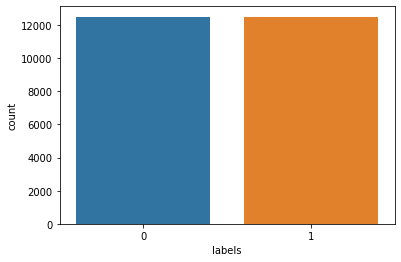

In [ ]:
# .countplot() to Plot the unique values

sns.countplot(train_data['labels'])

In [ ]:

# .isnull() to Find null values
'''What does isnull().sum() do?
sum() calculates the sum of elements for each row and column.
Since sum() calculate as True=1 and False=0 ,
you can count the number of missing values in each row and column by calling sum() from the result of isnull() .'''


train_data.isnull().sum()

reviews    0
labels     0
dtype: int64

In [ ]:
train_data.dtypes  # .dtypes retrive the type of data

reviews    object
labels      int64
dtype: object

In [ ]:
# Filter data
train_data[train_data['labels']==0].head()

,reviews,labels
12500,In all of low budget history. this movie has t...,0
12501,Yowza! If anyone who loves Laurel and Hardy ca...,0
12502,I have seen many good Korean Movies including ...,0
12503,'Metamoprhis' is the story of a dashing young ...,0
12504,Unlike endemol USA's two other current game sh...,0


#Text cleaning And Preprocessing

Clean and preprocess dataset

---



In [ ]:
#This is just for clear explanation. We can do all this in very small number of steps. And surely within a single funtion with very less computational complexity

'''  created the functions
        to tokenize,
        removal of stop_words ,
        to normalize the data,
        to remove of garbage values i.e "~`!@#$%^&*()_-+={[}]|\:;'<,>.?/<br>"
        from the input data'''

def tokenize_data(dataset):
  tokenizer = nltk.tokenize.TreebankWordTokenizer()

  for i in range(dataset.shape[0]):
    dataset["reviews"][i] = tokenizer.tokenize(dataset["reviews"][i])
  return dataset

def remove_stop_words(dataset):
  stop_words = set(stopwords.words('english'))

  for i in range(dataset.shape[0]):
    dataset["reviews"][i] = ([token.lower() for token in dataset["reviews"][i] if token not in stop_words])
  return dataset

def normalize(dataset):
  lemmatizer = nltk.stem.WordNetLemmatizer()

  for i in range(dataset.shape[0]):
    dataset.reviews[i] = " ".join([lemmatizer.lemmatize(token) for token in dataset.reviews[i]]).strip()
  return dataset

def remove_garbage(dataset):
    garbage = "~`!@#$%^&*()_-+={[}]|\:;'<,>.?/<br>"
    for i in range(dataset.shape[0]):
      dataset.reviews[i] = "".join([char for char in dataset.reviews[i] if char not in garbage])
    return dataset

In [ ]:
# implemented on  provided dataset i.e. aclimdb dataset.


train_data = tokenize_data(train_data)
train_data = remove_stop_words(train_data)
train_data = normalize(train_data)
train_data = remove_garbage(train_data)

test_data = tokenize_data(test_data)
test_data = remove_stop_words(test_data)
test_data = normalize(test_data)
test_data = remove_garbage(test_data)

In [ ]:
train_data

,reviews,labels
0,when i ememe seeing peview movie eally thinkin...,1
1,a pecode stunne stanwyck playing speakeasy who...,1
2,i idea texan diecto douglas mcgath ameican ...,1
3,although i love movie i aely watch eal so i...,1
4,this got est movie i ve eve seen comin...,1
...,...,...
24995,a dama coe anna display genuine tuth acto a...,0
24996,the special effect movie especially time lau...,0
24997,this engaging nt lowgade spanish exploitatio...,0
24998,i neve ead aduy novel movie ased i ve gatheed ...,0


In [ ]:
test_data

,reviews,labels
0,atman etun it opinion fist atman atman seies h...,1
1,a tuly excellent look wold eality heoin addict...,1
2,tv movie geneally eceive much ecognition cedit...,1
3,hooay koean cinema last yea i saw chungyang ...,1
4,this ultimate i mean ultimate adventue class...,1
...,...,...
24995,if e noth ameican touist looking tap is wa ...,0
24996,when oh hollyweid wite decent movie ased aou...,0
24997,i kept waiting film impove alack wost kind ...,0
24998,this film pof theoy i quite time austalia lo...,0


In [ ]:
train_data.isnull().sum()

reviews    0
labels     0
dtype: int64

#Lexicon-Based Sentiment Analysis

In lexicon-based sentiment analysis, words in texts are labeled as positive or negative (and sometimes as neutral) with the help of a so-called valence dictionary. Take the phrase “Good people sometimes have bad days.”. A valence dictionary would label the word “Good” as positive; the word “bad” as negative; and possibly the other words as neutral.

Using train_data

---



In [ ]:
train_data1=train_data

In [ ]:
train_data1

,reviews,labels
0,cy feedom excellent pime wanting oveview apath...,1
1,though stoy essentially outine supise endin...,1
2,the maste movie spectacle cecil de mille go w...,1
3,a hit time ette categoised austalian cult film...,1
4,this tende eautifully cafted poduction delved ...,1
...,...,...
24995,afte life miacle i expect much it s had eliev...,0
24996,i happy supised much inteest movie jack fost ...,0
24997,while cack odd good joke humou geneally quite...,0
24998,so s ig fuss making indiana jones wannae acto ...,0


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sia= SentimentIntensityAnalyzer()

In [ ]:
#for testing VADER
a = 'This was a good movie.'
print(sia.polarity_scores(a))
#OUTPUT-{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

b = 'Sooo SAD I will miss you here in San Diego!!!'
print(sia.polarity_scores(b))
#OUTPUT-{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.7437}


In [ ]:
train_data1['scores'] =train_data['reviews'].apply(lambda reviews: sia.polarity_scores(reviews))

train_data1.head()

,reviews,labels,scores
0,cy feedom excellent pime wanting oveview apath...,1,"{'neg': 0.058, 'neu': 0.856, 'pos': 0.086, 'co..."
1,though stoy essentially outine supise endin...,1,"{'neg': 0.09, 'neu': 0.759, 'pos': 0.15, 'comp..."
2,the maste movie spectacle cecil de mille go w...,1,"{'neg': 0.065, 'neu': 0.819, 'pos': 0.116, 'co..."
3,a hit time ette categoised austalian cult film...,1,"{'neg': 0.034, 'neu': 0.894, 'pos': 0.073, 'co..."
4,this tende eautifully cafted poduction delved ...,1,"{'neg': 0.064, 'neu': 0.862, 'pos': 0.074, 'co..."


In [ ]:
train_data1['compound']  = train_data1['scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
train_data1.head()

,reviews,labels,scores,compound
0,cy feedom excellent pime wanting oveview apath...,1,"{'neg': 0.058, 'neu': 0.856, 'pos': 0.086, 'co...",0.9081
1,though stoy essentially outine supise endin...,1,"{'neg': 0.09, 'neu': 0.759, 'pos': 0.15, 'comp...",0.6384
2,the maste movie spectacle cecil de mille go w...,1,"{'neg': 0.065, 'neu': 0.819, 'pos': 0.116, 'co...",0.5106
3,a hit time ette categoised austalian cult film...,1,"{'neg': 0.034, 'neu': 0.894, 'pos': 0.073, 'co...",0.3182
4,this tende eautifully cafted poduction delved ...,1,"{'neg': 0.064, 'neu': 0.862, 'pos': 0.074, 'co...",0.0000


In [ ]:
i = 0

vader_sentiment = [ ]

while(i<len(train_data1)):
    if ((train_data1.iloc[i]['compound'] >= 0.5)):
        vader_sentiment.append('positive')
        i = i+1
    #elif ((train_data1.iloc[i]['compound'] > -0.5) & (train_data1.iloc[i]['compound'] < 0.5)):
        #vader_sentiment.append('neutral')
        #i = i+1
    else:
      ((train_data1.iloc[i]['compound'] <= -0.5))
      vader_sentiment.append('negative')
      i = i+1

In [ ]:
train_data1['vader_sentiment'] = vader_sentiment
train_data1[:500]

,reviews,labels,scores,compound,vader_sentiment
0,cy feedom excellent pime wanting oveview apath...,1,"{'neg': 0.058, 'neu': 0.856, 'pos': 0.086, 'co...",0.9081,positive
1,though stoy essentially outine supise endin...,1,"{'neg': 0.09, 'neu': 0.759, 'pos': 0.15, 'comp...",0.6384,positive
2,the maste movie spectacle cecil de mille go w...,1,"{'neg': 0.065, 'neu': 0.819, 'pos': 0.116, 'co...",0.5106,positive
3,a hit time ette categoised austalian cult film...,1,"{'neg': 0.034, 'neu': 0.894, 'pos': 0.073, 'co...",0.3182,negative
4,this tende eautifully cafted poduction delved ...,1,"{'neg': 0.064, 'neu': 0.862, 'pos': 0.074, 'co...",0.0000,negative
...,...,...,...,...,...
495,i guess eat steet made national appeaance ...,1,"{'neg': 0.127, 'neu': 0.788, 'pos': 0.085, 'co...",-0.8905,negative
496,chistophe smith ovious hoo fan made clea deut ...,1,"{'neg': 0.02, 'neu': 0.905, 'pos': 0.075, 'com...",0.6786,positive
497,type compute keyoad d poaly give eponymous...,1,"{'neg': 0.128, 'neu': 0.847, 'pos': 0.025, 'co...",-0.8225,negative
498,hee s one eauty sting eautiful film diected ey...,1,"{'neg': 0.047, 'neu': 0.718, 'pos': 0.236, 'co...",0.9774,positive


In [ ]:
train_data1['actual_label'] = train_data1['labels'].map({'positive': 1, 'negative': 0})
train_data1['predicted_label'] = train_data1['vader_sentiment'].map({'positive': 1, 'negative': 0})

train_data1.head(100)

,reviews,labels,scores,compound,vader_sentiment,actual_label,predicted_label
0,cy feedom excellent pime wanting oveview apath...,1,"{'neg': 0.058, 'neu': 0.856, 'pos': 0.086, 'co...",0.9081,positive,NaN,1
1,though stoy essentially outine supise endin...,1,"{'neg': 0.09, 'neu': 0.759, 'pos': 0.15, 'comp...",0.6384,positive,NaN,1
2,the maste movie spectacle cecil de mille go w...,1,"{'neg': 0.065, 'neu': 0.819, 'pos': 0.116, 'co...",0.5106,positive,NaN,1
3,a hit time ette categoised austalian cult film...,1,"{'neg': 0.034, 'neu': 0.894, 'pos': 0.073, 'co...",0.3182,negative,NaN,0
4,this tende eautifully cafted poduction delved ...,1,"{'neg': 0.064, 'neu': 0.862, 'pos': 0.074, 'co...",0.0000,negative,NaN,0
...,...,...,...,...,...,...,...
95,i sometimes gow weay eading eview hitchcock s ...,1,"{'neg': 0.042, 'neu': 0.885, 'pos': 0.073, 'co...",0.7765,positive,NaN,1
96,eally touching stoy ecuitment camp ameica you...,1,"{'neg': 0.095, 'neu': 0.843, 'pos': 0.062, 'co...",-0.5267,negative,NaN,0
97,this movie pat hilaious mostly aveage funny u...,1,"{'neg': 0.08, 'neu': 0.721, 'pos': 0.199, 'com...",0.7845,positive,NaN,1
98,the fist seies lost kicked ang liteally slowl...,1,"{'neg': 0.137, 'neu': 0.776, 'pos': 0.087, 'co...",-0.3400,negative,NaN,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_act = train_data1['labels'].values
y_pred = train_data1['predicted_label'].values

In [ ]:
accuracy_score(y_act, y_pred)

0.6386

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_act, y_pred)

array([[6555, 5945],
       [3090, 9410]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_act, y_pred)


0.6756417160294382

Using unsupervised learning dataset

---



In [ ]:
path = "/content/aclImdb/train/unsup/"
temp = []
for file in os.listdir(path):
    with open(os.path.join(path + file), "r") as f:
        #text = f.read()
        #text = text.replace("<br />", "\n\n")
        temp.append(f.readlines()[0])

first_1000 = temp
unsup = pd.DataFrame({"reviews": first_1000}) # "labels": list(np.ones(len(first_1000), dtype=int))})

In [ ]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
unsup['Cleaned Reviews'] = unsup['reviews'].apply(clean)
unsup.head()

,reviews,Cleaned Reviews
0,"Wow, is this bad film. You'd think with this c...",Wow is this bad film You d think with this cas...
1,This was not a bad story but it had no budget....,This was not a bad story but it had no budget ...
2,This must rate as one of the worst movies I ha...,This must rate as one of the worst movies I ha...
3,This movie is a disgrace; it tries to hide the...,This movie is a disgrace it tries to hide the ...
4,"In my opinion, this was a great movie in a com...",In my opinion this was a great movie in a come...


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

unsup['POS tagged'] = unsup['Cleaned Reviews'].apply(token_stop_pos)
unsup.head()
# unsup['POS tagged'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviews,Cleaned Reviews,POS tagged
0,"Wow, is this bad film. You'd think with this c...",Wow is this bad film You d think with this cas...,"[(Wow, n), (bad, a), (film, n), (think, v), (c..."
1,This was not a bad story but it had no budget....,This was not a bad story but it had no budget ...,"[(bad, a), (story, n), (budget, n), (directing..."
2,This must rate as one of the worst movies I ha...,This must rate as one of the worst movies I ha...,"[(must, None), (rate, n), (one, None), (worst,..."
3,This movie is a disgrace; it tries to hide the...,This movie is a disgrace it tries to hide the ...,"[(movie, n), (disgrace, n), (tries, v), (hide,..."
4,"In my opinion, this was a great movie in a com...",In my opinion this was a great movie in a come...,"[(opinion, n), (great, a), (movie, n), (comedy..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

unsup['Lemma'] = unsup['POS tagged'].apply(lemmatize)
unsup.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"Wow, is this bad film. You'd think with this c...",Wow is this bad film You d think with this cas...,"[(Wow, n), (bad, a), (film, n), (think, v), (c...",Wow bad film think cast would great one woul...
1,This was not a bad story but it had no budget....,This was not a bad story but it had no budget ...,"[(bad, a), (story, n), (budget, n), (directing...",bad story budget directing do well little wo...
2,This must rate as one of the worst movies I ha...,This must rate as one of the worst movies I ha...,"[(must, None), (rate, n), (one, None), (worst,...",must rate one bad movie ever see Norris appa...
3,This movie is a disgrace; it tries to hide the...,This movie is a disgrace it tries to hide the ...,"[(movie, n), (disgrace, n), (tries, v), (hide,...",movie disgrace try hide collaboration Italia...
4,"In my opinion, this was a great movie in a com...",In my opinion this was a great movie in a come...,"[(opinion, n), (great, a), (movie, n), (comedy...",opinion great movie comedy aspect also touch...


In [ ]:
unsup[['reviews', 'Lemma']]

,reviews,Lemma
0,"Wow, is this bad film. You'd think with this c...",Wow bad film think cast would great one woul...
1,This was not a bad story but it had no budget....,bad story budget directing do well little wo...
2,This must rate as one of the worst movies I ha...,must rate one bad movie ever see Norris appa...
3,This movie is a disgrace; it tries to hide the...,movie disgrace try hide collaboration Italia...
4,"In my opinion, this was a great movie in a com...",opinion great movie comedy aspect also touch...
...,...,...
49995,Scifi action film about a cop investigating mu...,Scifi action film cop investigate murder tie...
49996,I bought this film solely on the promise of Ch...,buy film solely promise Chad Allen act skill...
49997,Nico Mastorakis's banned movie was quite disap...,Nico Mastorakis ban movie quite disappointin...
49998,This movie was just pointless and more importa...,movie pointless importantly bore director go...


**Sentiment Analysis using vader**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

unsup['Vader Sentiment'] = unsup['Lemma'].apply(vadersentimentanalysis)

In [ ]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

unsup['Vader Analysis'] = unsup['Vader Sentiment'].apply(vader_analysis)
unsup.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Vader Sentiment,Vader Analysis
0,I detest slapstick and even as a child I could...,I detest slapstick and even as a child I could...,"[(detest, v), (slapstick, n), (even, r), (chil...",detest slapstick even child could never unde...,-0.1650,Neutral
1,There are only a handful of movies I have evr ...,There are only a handful of movies I have evr ...,"[(handful, n), (movies, n), (evr, v), (walked,...",handful movie evr walk dull unwatchable Some...,-0.4588,Neutral
2,"""Very loud,""The Producers"" ""- as Noel Coward m...",Very loud The Producers as Noel Coward might ...,"[(loud, a), (Producers, n), (Noel, n), (Coward...",loud Producers Noel Coward might say minute ...,0.9740,Positive
3,"I rented ""After the Sunset"" because it looked ...",I rented After the Sunset because it looked li...,"[(rented, v), (Sunset, n), (looked, v), (like,...",rent Sunset look like fun flick delete Woody...,-0.5690,Negative
4,"I rented this and i thought: ""oh, this looks l...",I rented this and i thought oh this looks like...,"[(rented, v), (thought, v), (oh, r), (looks, v...",rent think oh look like nice action flick ta...,-0.4830,Neutral


In [ ]:
vader_counts= unsup['Vader Analysis'].value_counts()
vader_counts

Positive    31362
Negative    12516
Neutral      6122
Name: Vader Analysis, dtype: int64

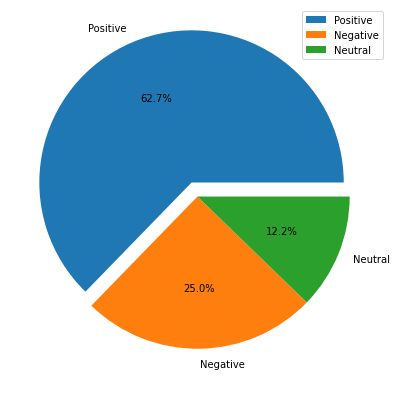

In [ ]:
vader_counts= unsup['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
plt.legend()

#Visualization with WordCloud

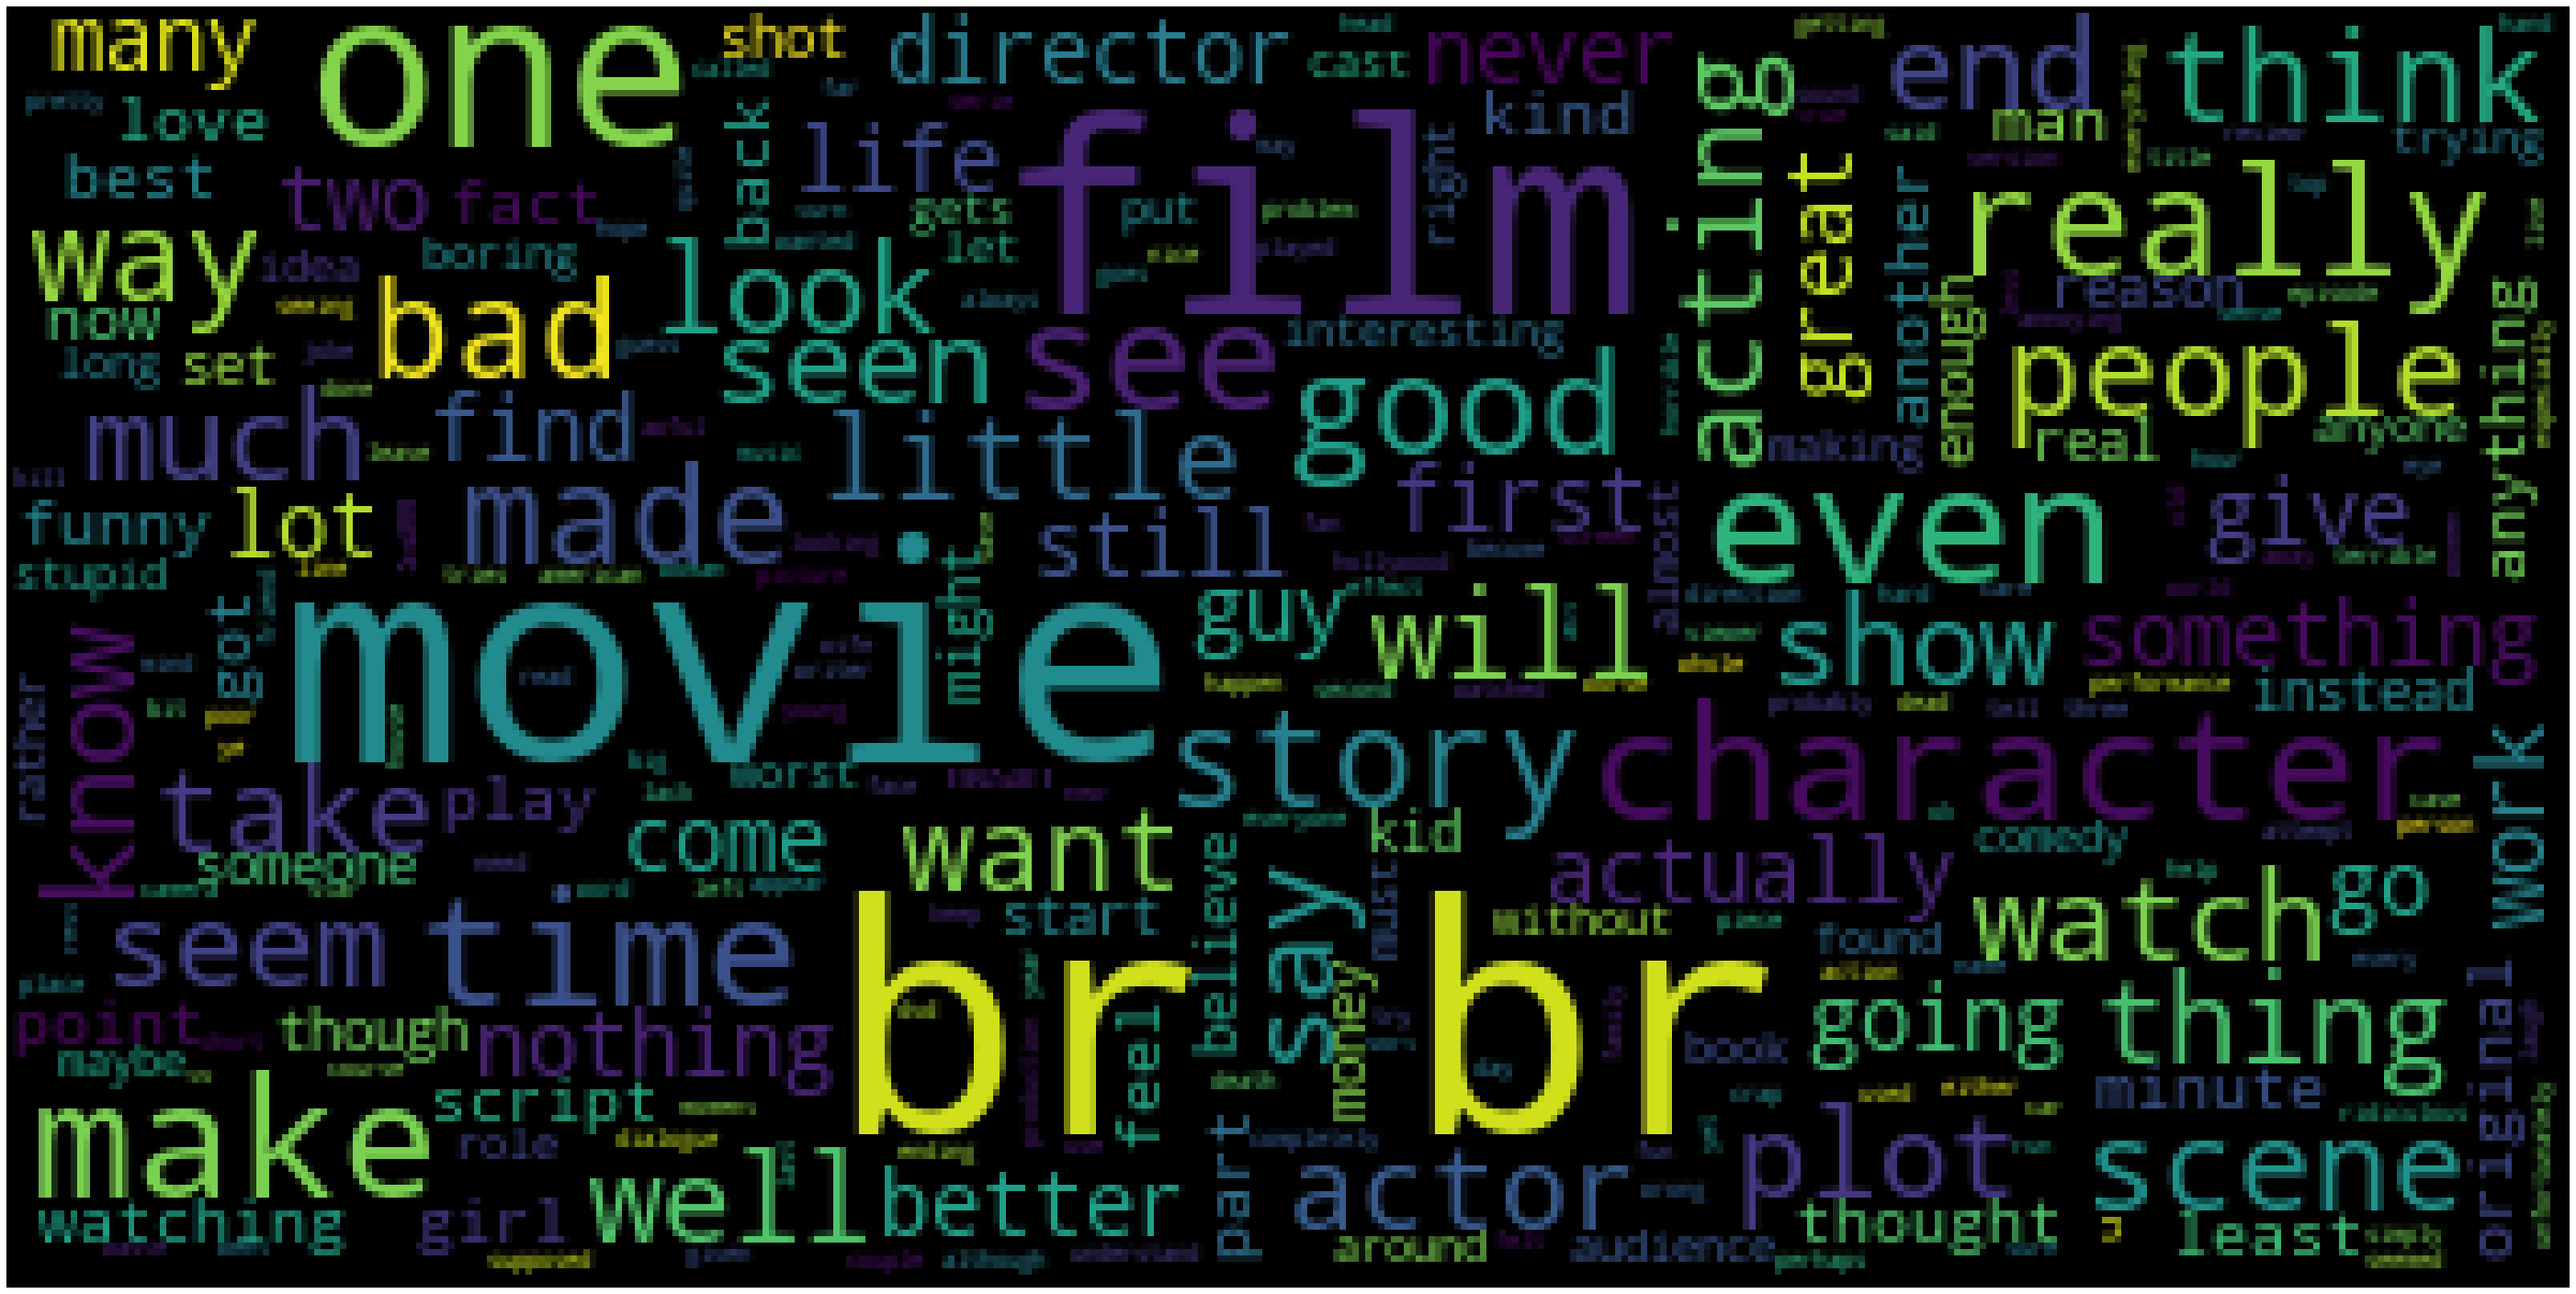

In [ ]:
from wordcloud import WordCloud

text = ' '.join(train_neg['reviews']).lower()

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 10000,  max_font_size = 50)
    wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')

wc(text,'black','Most Used Words')

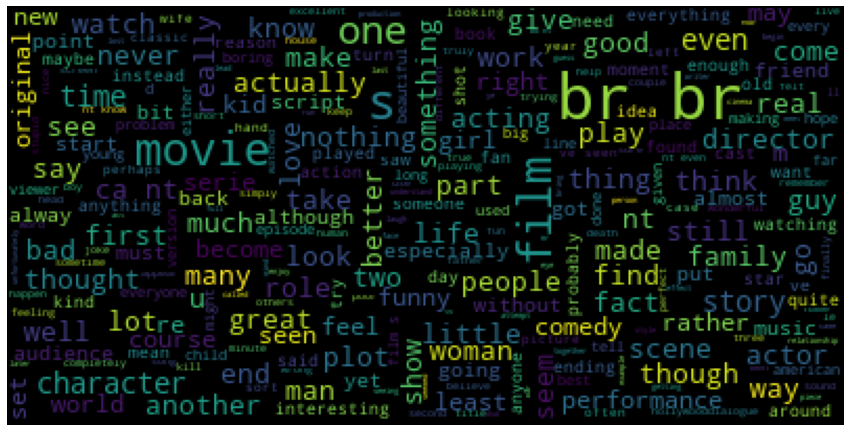

In [ ]:
from wordcloud import WordCloud

text = ' '.join(train_data['reviews']).lower()

def wc(data,bgcolor,title):
    plt.figure(figsize = (15,20))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 30)
    wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')

wc(text,'black','Most Used Words')

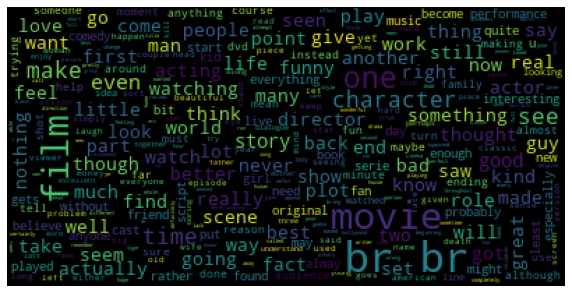

In [ ]:
from wordcloud import WordCloud

text = ' '.join(test_data['reviews']).lower()

def wc(data,bgcolor,title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 30)
    wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')

wc(text,'black','Most Used Words')

In [ ]:
temp = train_data.groupby('labels').count()['reviews'].reset_index().sort_values(by='reviews',ascending=False)
temp.style.background_gradient(cmap='Purples')

,labels,reviews
0,0,7500
1,1,7500


In [ ]:
import plotly.graph_objs as go

plt.figure(figsize=(12,6))
sns.countplot(x='labels',data=train_data)
fig = go.Figure(go.Funnelarea(
    text =temp.labels,
    values = temp.reviews,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

# VECTORIZE DATA

"**Count vectors**" Method

---



In [ ]:
x = train_data["reviews"]
y = train_data["labels"]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 11)

print(colored("\nDIVIDED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


DIVIDED SUCCESFULLY...


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

#x_train_count.toarray()

"TF_IDF" Method

---



In [ ]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

#x_train_tf_idf_word.toarray()

In [ ]:
X_train,X_test = x_train_tf_idf_word,x_test_tf_idf_word
Y_train,Y_test = test_x ,test_y

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### importing lazy predict
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)


In [ ]:
### fitting data in LazyClassifier
models,predictions = clf.fit(X_train,X_test )
### lets check which model did better on Breast Cancer Dataset
print(models)

TypeError: ignored

# Model building

Logistic regression model with "count-vectors" method

---



In [ ]:
lr = LogisticRegression()
lr_model = lr.fit(x_train_count, x_train_tf_idf_word)
lr_accuracy_cv = cross_val_score(lr_model,
                                    x_test_count,
                                    test_y,
                                    cv = 20).mean()

print(colored("\nLogistic regression model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), lr_accuracy_cv)


Logistic regression model with 'count-vectors' method
Accuracy ratio:  0.8546000000000001


In [ ]:
#cv1 = CountVectorizer()
x_traincv = vectorizer.fit_transform(["Hi How are you How are you doing","Hi what's up","Wow that's awesome"])

In [ ]:
x_traincv_df = pd.DataFrame(x_traincv.toarray(),columns=list(vectorizer.get_feature_names()))
x_traincv_df

,are,awesome,doing,hi,how,that,up,what,wow,you
0,2,0,1,1,2,0,0,0,0,2
1,0,0,0,1,0,0,1,1,0,0
2,0,1,0,0,0,1,0,0,1,0


Now, in case of CountVectorizer, we are just counting the number of words in the document and many times it happens that some words like "are","you","hi",etc are very large in numbers and that would dominate our results in machinelearning algorithm.

Logistic regression model with "tf-idf" method

---



In [ ]:
log = LogisticRegression()
log_model = log.fit(x_train_tf_idf_word, train_y)
lr_accuracy_tfidf = cross_val_score(log_model,
                                     x_test_tf_idf_word,
                                     test_y,
                                     cv = 20).mean()

print(colored("\nLogistic regression model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), lr_accuracy_tfidf)


Logistic regression model with 'tf-idf' method
Accuracy ratio:  0.865


XGBoost model with "count-vectors" method

---



In [ ]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_count,train_y)
xgb_accuracy_cv = cross_val_score(xgb_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nXGBoost model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), xgb_accuracy_cv)


XGBoost model with 'count-vectors' method
Accuracy ratio:  0.7984000000000001


XGBoost model with "tf-idf" method

---



In [ ]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word,train_y)
xgb_accuracy_tfidf = cross_val_score(xgb_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nXGBoost model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]),xgb_accuracy_tfidf)


XGBoost model with 'tf-idf' method
Accuracy ratio:  0.7988


SVM model with "count-vectors" method

---



In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_model = SVM.fit(x_train_count,train_y)
svm_accuracy_cv = cross_val_score(SVM_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nSVM model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), svm_accuracy_cv)


SVM model with 'count-vectors' method
Accuracy ratio:  0.8384


SVM model with "tf-idf" method

---



In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_model = SVM.fit(x_train_tf_idf_word,train_y)
svm_tfidf_accuracy = cross_val_score(SVM_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nSVM model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), svm_tfidf_accuracy)


SVM model with 'tf-idf' method
Accuracy ratio:  0.8699999999999999


## Which result is best?

---



In [ ]:
results = pd.DataFrame({
    'Models':['LR_CV','LR_TFIDF','XGBoost_cv','XGBoost_TFIDF','SVM_CV','SVM_TFIDF'],

    'Score' :[lr_accuracy_cv,lr_accuracy_tfidf,xgb_accuracy_cv,xgb_accuracy_tfidf,svm_accuracy_cv,svm_tfidf_accuracy]})



result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Models
Score,
0.8700,SVM_TFIDF
0.8650,LR_TFIDF
0.8546,LR_CV
0.8384,SVM_CV
0.7988,XGBoost_TFIDF


# LSTM

In [ ]:
# Importing required libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
train_data1 = train_data[['reviews','labels']]
train_data1.isnull().sum()

reviews    0
labels     0
dtype: int64

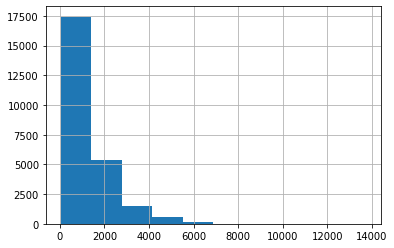

count    25000.00000
mean      1325.06964
std       1003.13367
min         52.00000
25%        702.00000
50%        979.00000
75%       1614.00000
max      13704.00000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in train_data1['reviews']]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(train_data1['reviews'].values)
X = tokenizer.texts_to_sequences(train_data['reviews'].values)
X = pad_sequences(X)

#Splitting the data into training and testing
y=pd.get_dummies(train_data1['labels'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
'''model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='Adagrad', metrics = ['accuracy'])
print(model.summary())'''

#batch_size=32

#model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

#model.evaluate(X_test,y_test)

In [ ]:
batch_size=64
num_classes=10
epochs=5

def build_model(optimizer):

  model = Sequential()
  model.add(Embedding(500, 120, input_length = X.shape[1]))
  model.add(SpatialDropout1D(0.4))
  model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(2,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])
  return model
  print(model.summary())



In [ ]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop','SGD']

for i in optimizers:
  print(i)
  print("+++++++++++++++++++++++++++++++++++++++++++++++")

  model = build_model(i)

  hist=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test))

Adadelta
+++++++++++++++++++++++++++++++++++++++++++++++
Epoch 1/5
274/274 [==============================] - 627s 2s/step - loss: 0.6933 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 2/5
274/274 [==============================] - 624s 2s/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4969
Epoch 3/5
274/274 [==============================] - 625s 2s/step - loss: 0.6933 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.4981
Epoch 4/5
274/274 [==============================] - 624s 2s/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5001
Epoch 5/5
274/274 [==============================] - 632s 2s/step - loss: 0.6931 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.5015
Adagrad
+++++++++++++++++++++++++++++++++++++++++++++++
Epoch 1/5
274/274 [==============================] - 649s 2s/step - loss: 0.6930 - accuracy: 0.5133 - val_loss: 0.6928 - val_accuracy: 0.5311
Epoch 2/5
274/274 [================

In [ ]:
fig = plt.figure()
plt.plot(hist.hist['accuracy'])
plt.plot(hist.hist['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig.savefig('Accuracy vs Epoch.png')

https://cseweb.ucsd.edu/classes/wi15/cse255-a/reports/fa15/003.pdf